In [54]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *


# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-21 18:43:40,573: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(np.pi/3,1,0) #angle,control,target
display(qc.draw())

#state vector simulator

sv_sim = Aer.get_backend('statevector_simulator')
qobject= assemble(qc)
state = sv_sim.run(qobject).result().get_statevector()
display(plot_bloch_multivector(state))

In [ ]:
#for n qubits

def QFT_rot(N,qc):   #performing rotation
    n = N-1
    
    
    for i in range(n,-1,-1):
        qc.h(i)
        g = 0
        for j in range(i):
            qc.cp(np.pi/(2**(n-j)),j,i)
        qc.barrier()
        
def QFT_swap(N,qc):   #performing swap
    for i in range(int(N/2)):
        qc.swap(i,N-i-1)
        
        
n = 5
qc = QuantumCircuit(n)
qc.x([0,2])
QFT_rot(n,qc)
QFT_swap(n,qc)
display(qc.draw())

sv_sim = Aer.get_backend('statevector_simulator')
qobject= assemble(qc)
state = sv_sim.run(qobject).result().get_statevector()
display(plot_bloch_multivector(state))
    

In [62]:
def QFT(N,qc):
    QFT_rot(N,qc)
    QFT_swap(N,qc)
    return qc

def inv_QFT(N,qc):  #inverse quantum fourier transform
    qft_circuit = QFT(N,QuantumCircuit(N))
    inv_qft = qft_circuit.inverse()
    qc.append(inv_qft,qc.qubits[ :n])
    return qc.decompose()
    

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


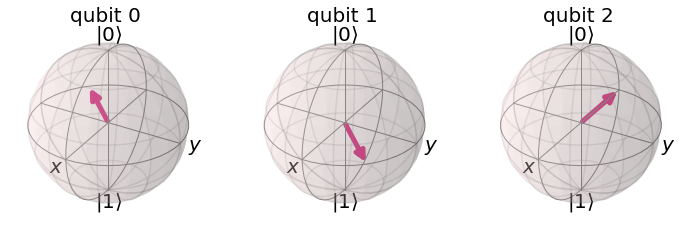

In [63]:
n = 3
qc = QuantumCircuit(n)
qc.x([0,2])
qc = QFT(n,qc)

sv_sim = Aer.get_backend('statevector_simulator')
qobject= assemble(qc)
state = sv_sim.run(qobject).result().get_statevector()
display(plot_bloch_multivector(state))


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


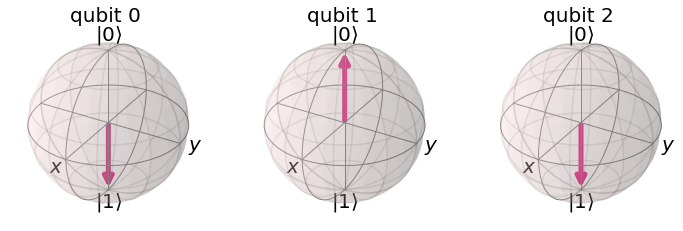

In [64]:
qcinv = inv_QFT(n,qc)
qobject= assemble(qcinv)
state = sv_sim.run(qobject).result().get_statevector()
display(plot_bloch_multivector(state))